In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# checking the null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

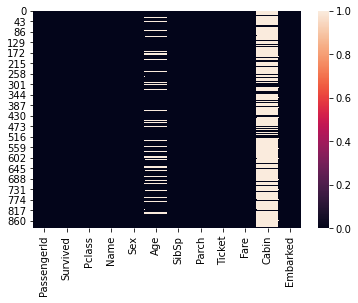

In [24]:
import seaborn as sns
sns.heatmap(df.isnull())

In [25]:
# replacing the nan values 

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
imp = SimpleImputer( strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [27]:
#again checking nan values

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
# dropping the columns not necessary for training n testing

df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [29]:
# encoding all to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Sex','Cabin','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [31]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

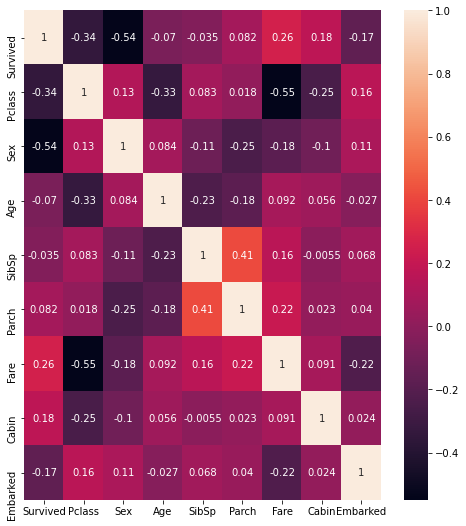

In [32]:
#heatmap correlation

# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [33]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [34]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [35]:
#again checking skewness

df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Cabin      -2.130144
Embarked   -1.264823
dtype: float64

Survived       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Pclass      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Sex         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Age         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
SibSp       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Parch       AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fare        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Cabin             AxesSubplot(0.125,0.125;0.0945122x0.343182)
Embarked       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

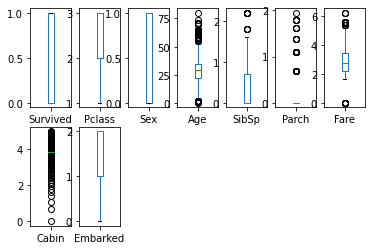

In [36]:
df.plot.box(subplots=True,layout=(2,7))

In [37]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(891, 9)
(833, 9)


In [42]:
df=df_new
df.shape

(833, 9)

In [38]:
# graphical representation


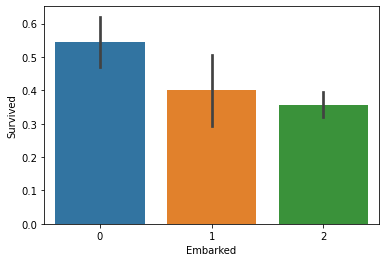

In [43]:
sns.barplot(x=df['Embarked'],y=df['Survived'],data=df)
plt.show()

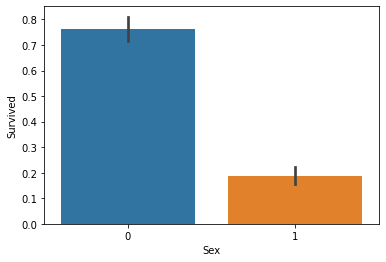

In [44]:
sns.barplot(x=df['Sex'],y=df['Survived'],data=df)
plt.show()

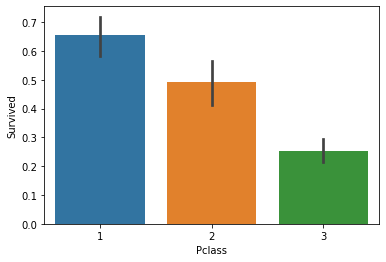

In [45]:
sns.barplot(x=df['Pclass'],y=df['Survived'],data=df)
plt.show()

In [47]:
#splitting the data for training and test

x=df.drop(columns=['Survived'])
y=df['Survived']

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.816166  ,  0.75218979, -0.57467387, ..., -0.98200832,
        -0.29064059,  0.59211848],
       [-1.6075997 , -1.32945171,  0.70553194, ...,  1.50733556,
         1.3912    , -1.93082111],
       [ 0.816166  , -1.32945171, -0.25462242, ..., -0.89180762,
        -0.29064059,  0.59211848],
       ...,
       [ 0.816166  , -1.32945171,  0.04135458, ...,  0.264071  ,
        -0.29064059,  0.59211848],
       [-1.6075997 ,  0.75218979, -0.25462242, ...,  0.53631051,
         0.4620724 , -1.93082111],
       [ 0.816166  ,  0.75218979,  0.22545476, ..., -0.91452049,
        -0.29064059, -0.66935132]])

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [51]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 0.8532608695652174 at 92


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=92)

In [53]:
# testing other models too

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model=[GaussianNB(),SVC(),SVC(kernel='poly'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),DecisionTreeClassifier(criterion='entropy')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of GaussianNB() is:
0.7880434782608695
[[94 16]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.76      0.69      0.72        74

    accuracy                           0.79       184
   macro avg       0.78      0.77      0.78       184
weighted avg       0.79      0.79      0.79       184



Accuracy Score of SVC() is:
0.8913043478260869
[[103   7]
 [ 13  61]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       110
           1       0.90      0.82      0.86        74

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



Accuracy Score of SVC(kernel='poly') is:
0.8641304347826086
[[105   5]
 [ 20  54]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
       

In [57]:
# checking some ensemble models for more accuracy

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=92)   #estimator is 100 by default can change it 50,100,150...
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.8315217391304348
[[95 15]
 [16 58]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.79      0.78      0.79        74

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [58]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=92)   #estimator is 100 by default can change it 50,100,150...
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.7989130434782609
[[94 16]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.77      0.72      0.74        74

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



In [59]:
svc=SVC()

ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME') 
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.5978260869565217
[[110   0]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       110
           1       0.00      0.00      0.00        74

    accuracy                           0.60       184
   macro avg       0.30      0.50      0.37       184
weighted avg       0.36      0.60      0.45       184



In [60]:
svc=SVC(probability=True,kernel='linear')

ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc) 
ad.fit(x_train,y_train)
predad=rf.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8315217391304348
[[95 15]
 [16 58]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.79      0.78      0.79        74

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [61]:
# from the above max accuracy score is at svc =89

#cross validation

from sklearn.model_selection import cross_val_score

svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.80838323 0.81437126 0.77245509 0.77710843 0.80120482]
0.7947045667700744 0.016857052251614726


In [62]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("accuracy score",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score 0.8913043478260869
[[103   7]
 [ 13  61]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       110
           1       0.90      0.82      0.86        74

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



In [63]:
#saving the above model

import joblib

joblib.dump(svc,'svcfile_titanic_project2.obj')                     # save the model in ojet file
svc_from_joblib=joblib.load('svcfile_titanic_project2.obj')         # load the model from the file
svc_from_joblib.predict(x_test)                         # use the loaded model to make prediction

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)